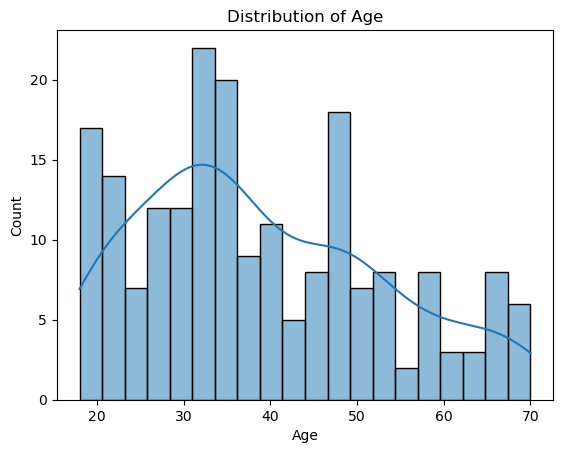

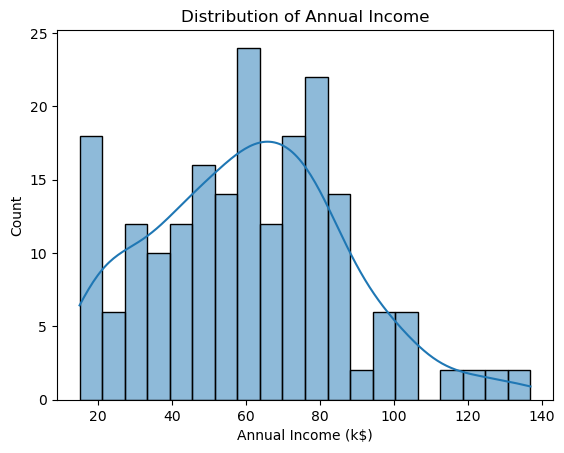

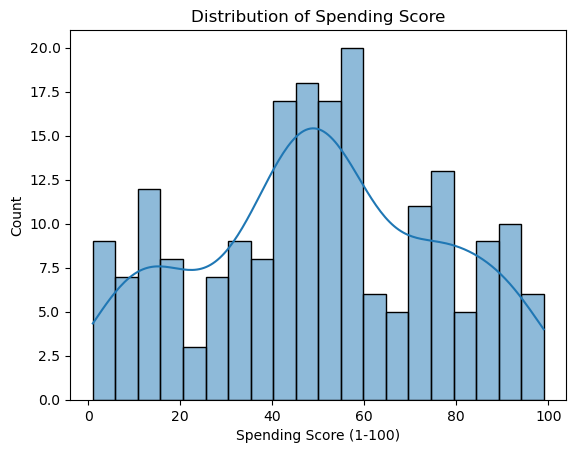

C:\Users\vasyl\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


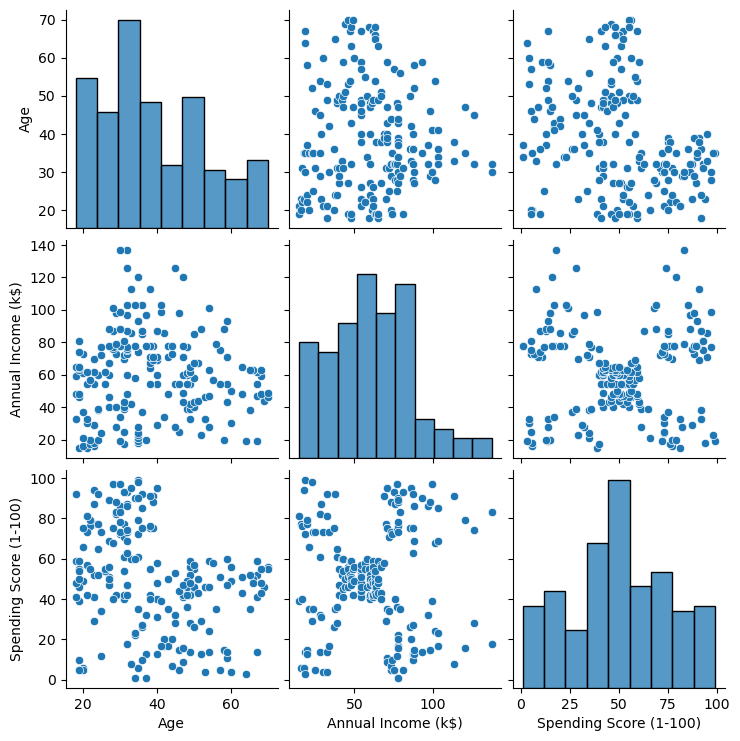

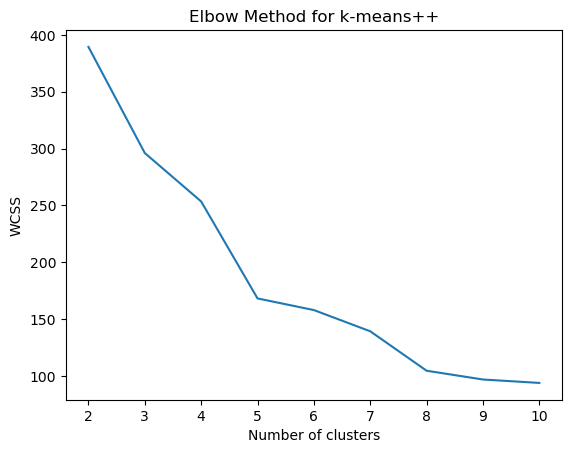

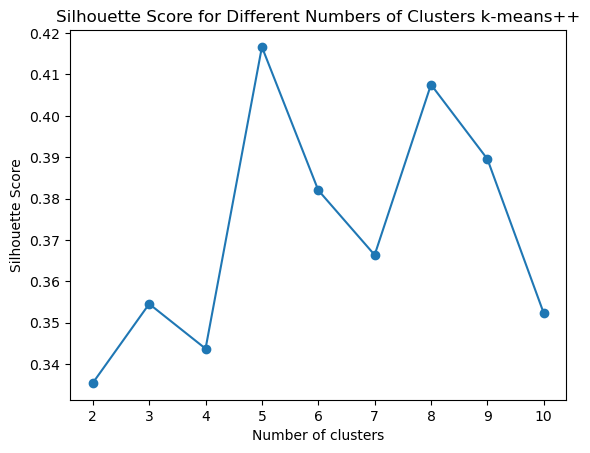

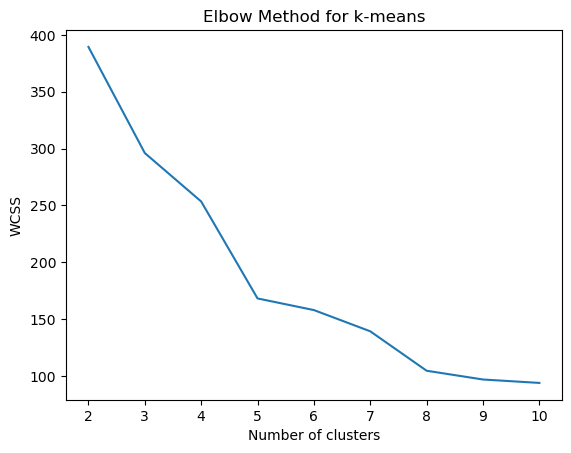

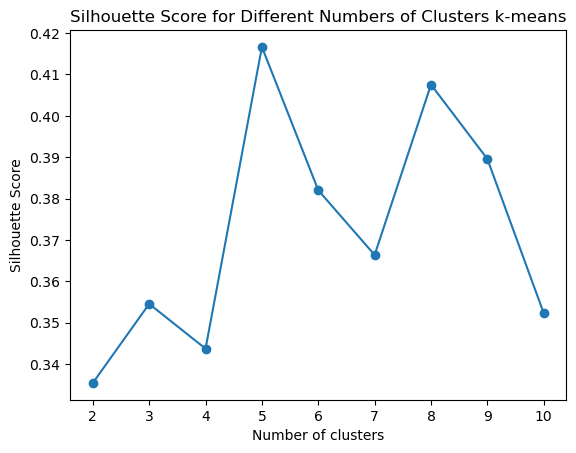

C:\Users\vasyl\AppData\Local\Temp\ipykernel_18308\700703290.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'Cluster'] = cluster_labels


               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        55.638298           54.382979               48.851064
1        32.875000           86.100000               81.525000
2        25.185185           41.092593               62.240741
3        46.250000           26.750000               18.350000
4        39.871795           86.102564               19.358974
Silhouette Score: 0.41664341513732767


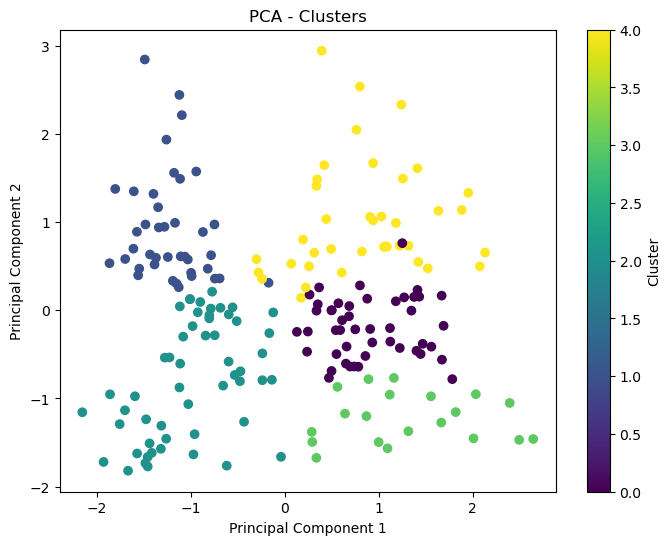

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '1'
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

data = pd.read_csv("Mall_Customers.csv")
data.drop_duplicates(inplace=True)
selected_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

X = data[selected_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sns.histplot(data=X, x='Age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

sns.histplot(data=X, x='Annual Income (k$)', bins=20, kde=True)
plt.title('Distribution of Annual Income')
plt.show()

sns.histplot(data=X, x='Spending Score (1-100)', bins=20, kde=True)
plt.title('Distribution of Spending Score')
plt.show()

sns.pairplot(data=X)
plt.show()

#k-means++ check
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init = 'auto')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method for k-means++')
plt.xlabel('Number of clusters')
plt.xticks(range(2, 11))
plt.ylabel('WCSS')
plt.show()

silhouette_scores = []
for n_clusters in range(2, 11):  # Trying clusters from 2 to 10
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters k-means++')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.show()

#k-means check
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init = 'auto')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method for k-means')
plt.xlabel('Number of clusters')
plt.xticks(range(2, 11))
plt.ylabel('WCSS')
plt.show()

silhouette_scores = []
for n_clusters in range(2, 11):  # Trying clusters from 2 to 10
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters k-means')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.show()

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init = 'auto')
cluster_labels = kmeans.fit_predict(X_scaled)

X.loc[:, 'Cluster'] = cluster_labels
X.loc[:, 'Cluster'] = X.loc[:, 'Cluster'].astype('category')
cluster_means = X.groupby('Cluster').mean()
print(cluster_means)


silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score:", silhouette_avg)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Clusters')
plt.colorbar(label='Cluster')
plt.show()